# Homework 3: Using ggplot

This homework assignment is designed to get you comfortable working with `ggplot` for generating data visualizations.

We will be using the [gapminder](https://cran.r-project.org/web/packages/gapminder/README.html) dataset. It contains  information about population, life expectancy and per capita GDP by country over time.

---
# 1. Color, plot type and layers (4 points)

Install and load the `gapminder` dataset. Look at the first few rows of the data frame.

In [3]:
# install.packages('gapminder') #commented out so that I don't reinstall everytime I run the code
library(gapminder);
library(ggplot2)

hw3_data <- gapminder

Now, let's create a basic scatterplot using `ggplot2` that shows how life expectancy has changed over time.

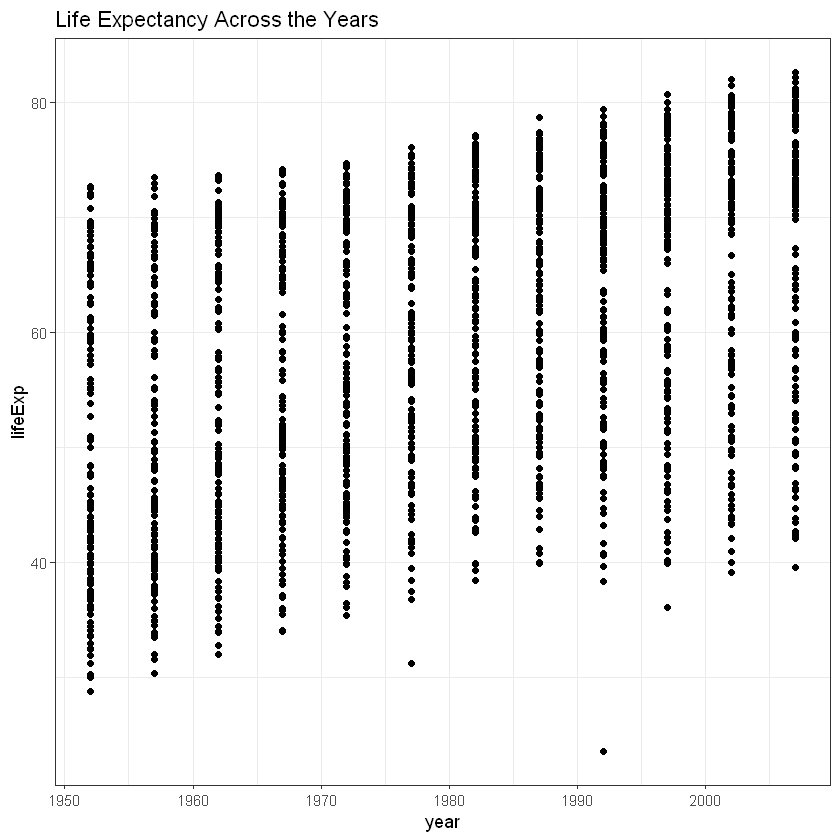

In [22]:
ggplot(hw3_data, aes(year, lifeExp)) +
    geom_point() +
    theme_bw() +
    ggtitle("Life Expectancy Across the Years")
# Add title & axes (didn't do this because as I kept doing the homework, I realize that WAS the homework!)

We can add another layer of detail by using color to indicate continent. Modify the code from the previous question to to do so. 

What trends can you identify in the data? 

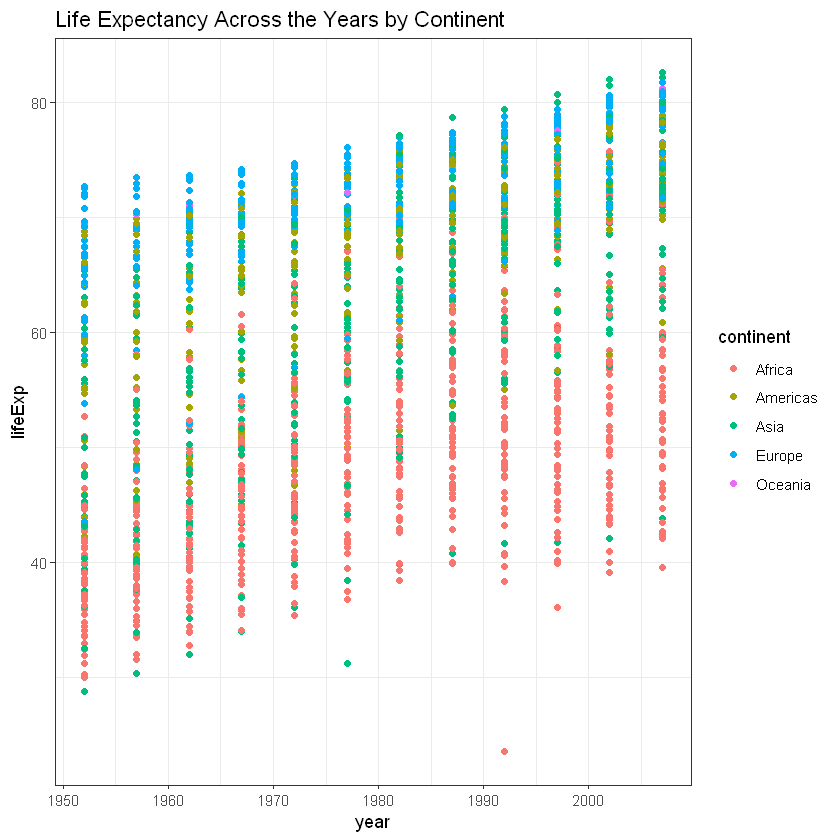

In [23]:
ggplot(hw3_data, aes(year, lifeExp, colour=continent)) +
   geom_point() +
     theme_bw() +
    ggtitle("Life Expectancy Across the Years by Continent")


> 1) Overall, life expectancy seems to be increasing with time. 

> 2) Life expectancy seems to be lower in Africa compared to the other continents.

> 3) Europe used to have the highest life expectancy overall, but in more recent year a couple asian countries have higher life expectancy than countries in Europe. 

Using a scatterplot probably isn’t the best type of plot for effectively visualizing change over time. Instead, modify the code from the previous question to create a line plot. 

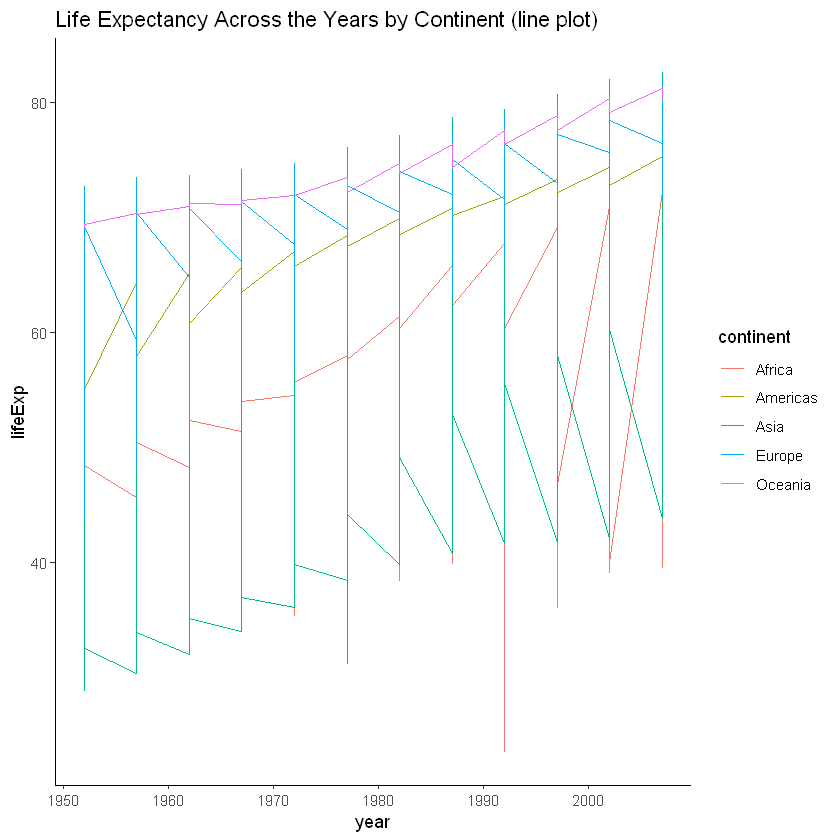

In [24]:
ggplot(hw3_data, aes(year, lifeExp, colour=continent, group)) +
     geom_line() +
     theme_classic()+
    ggtitle("Life Expectancy Across the Years by Continent (line plot)")


Hmm, this plot looks a bit weird and unexpected, making it difficult for us to easily interpret the data trends. What is causing this?

>  The data are discrete and not continous (we have a single value per year, not one value per day, so there needs to be a smoothing process to infer what the data look like between known values to avoid the huge jumps that make the plot above look wonky... Let's use smooth to do that

> Later MT edit: I realized later that this was also part of the homework, but I left it in just for fun... 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


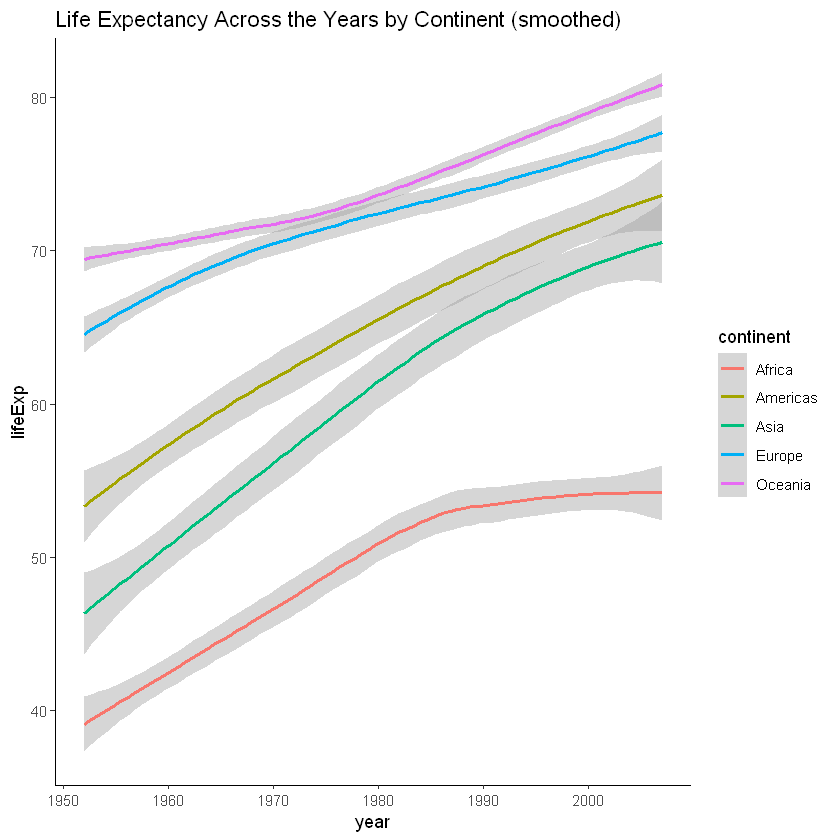

In [26]:
ggplot(hw3_data, aes(year, lifeExp, colour=continent)) +
    geom_smooth() +
    theme_classic() +
    ggtitle("Life Expectancy Across the Years by Continent (smoothed)")

Now, let’s try to separate the data by country, plotting one line for each country. Modify the code from the previous plot to do so.

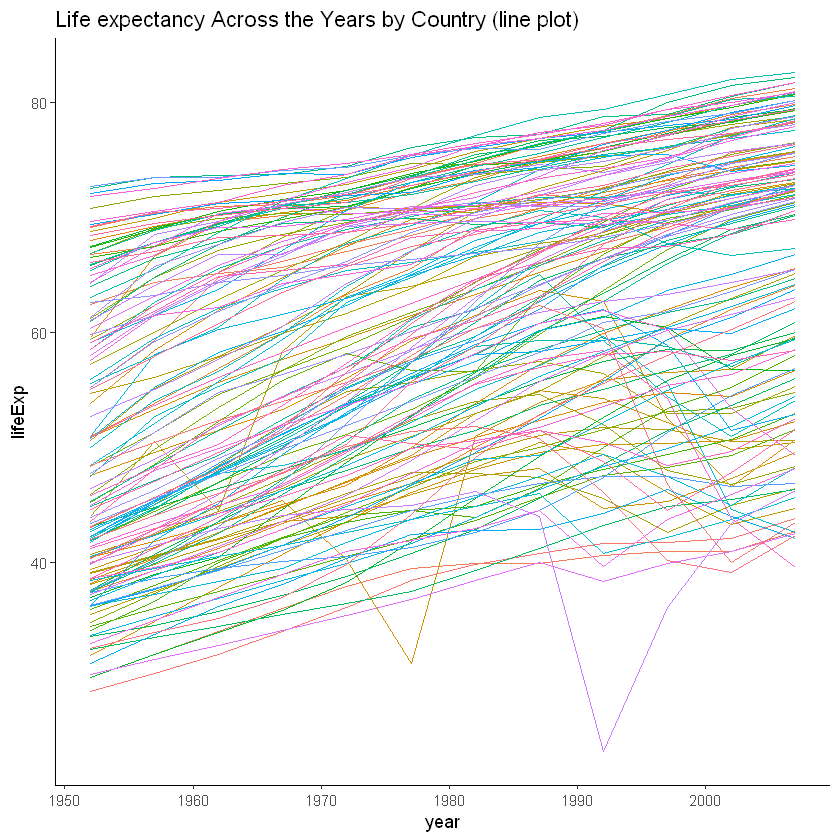

In [27]:
ggplot(hw3_data, aes(year, lifeExp, colour=country)) +
    geom_line() +
    theme_classic() +
    theme(legend.position="none") +
    ggtitle("Life expectancy Across the Years by Country (line plot)")



But what if we want to visualize both lines and points on our graph? There are two primary ways to do this - taking advantage of what we know about using layers for ggplot (each layer is drawn on top of the previous layer). 

* Method 1: Plot black points on top of the colorful lines
* Method 2: Plot black points underneath the colorful lines

Modify the code from the previous question to create two plots, one for each method.

*Hint: to control the color of the points, think about where the aesthetic color attribute should be located e.g., in the global plot options or in a specific layer.*

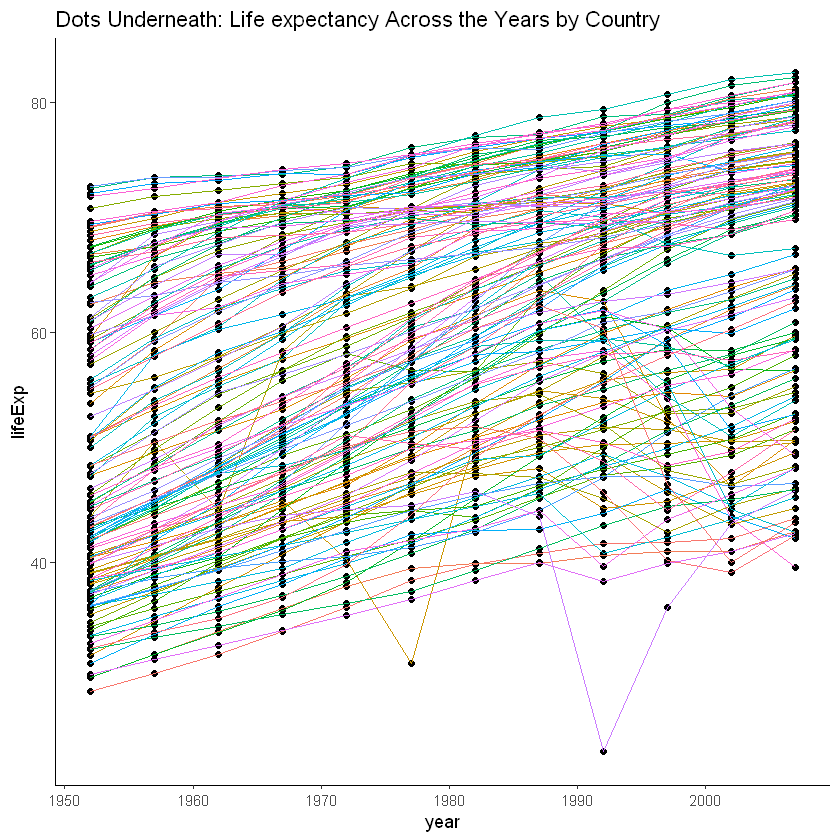

In [30]:
dots_below <- ggplot(hw3_data, aes(year, lifeExp)) +
   geom_point() +
   geom_line(aes(colour=country)) +
      theme_classic() +
      theme(legend.position="none")+
    ggtitle("Dots Underneath: Life expectancy Across the Years by Country")
   #####ADD title & axes
dots_below


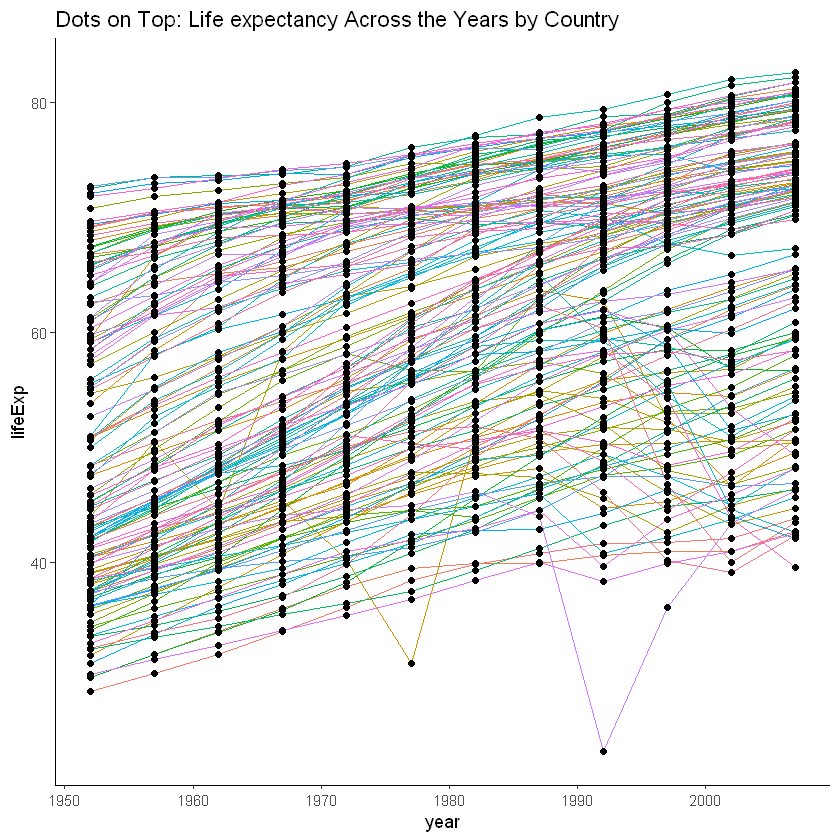

In [29]:
dots_top <- ggplot(hw3_data, aes(year, lifeExp)) +
   geom_line(aes(colour=country)) +
   geom_point() +
   theme_classic() +
   theme(legend.position="none")+
    ggtitle("Dots on Top: Life expectancy Across the Years by Country") 
#####ADD title & axes
dots_top

---
# 2. Adding statistics (3 points)

`ggplot2` allows easy overlay of statistical models on top of the data. 

The graph below shows the relationship between life expectency and GDP per capita:

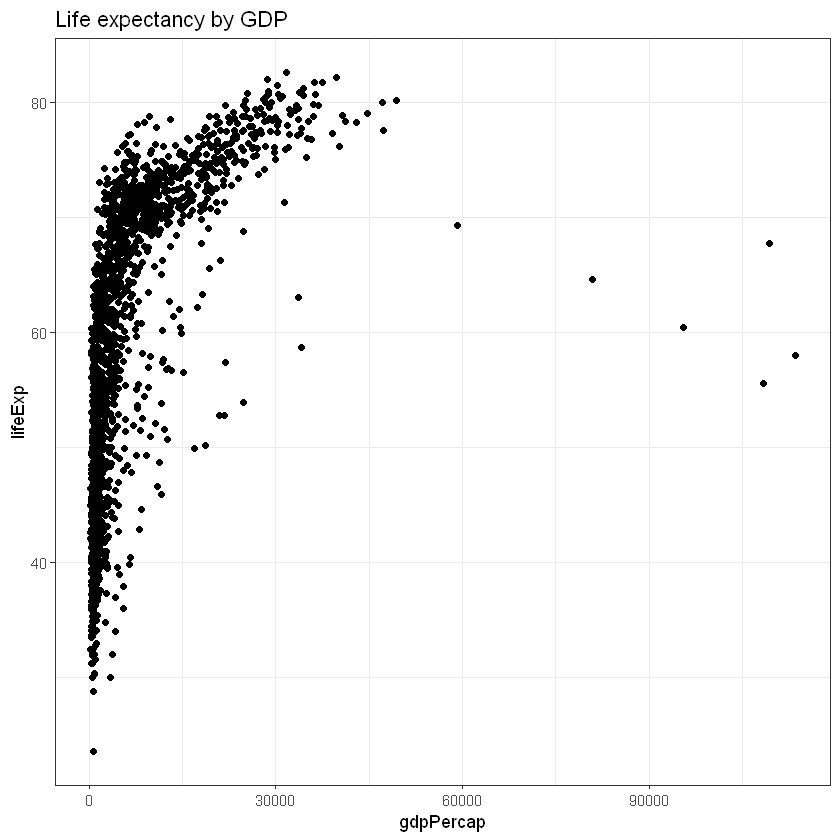

In [34]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
    geom_point() +
    theme_bw() +
    ggtitle("Life expectancy by GDP") 

However, the data points are squished close together on the left side of the graph, so it's hard to see the actual relationship we're interested in.

To fix this, we can change the scale of x-axis units using the scale functions. We can also make the data points transparent using the alpha function. This is helpful when there is a large amount of clustered data.

Modify the code above to incorporate these two changes (scale and transparency).

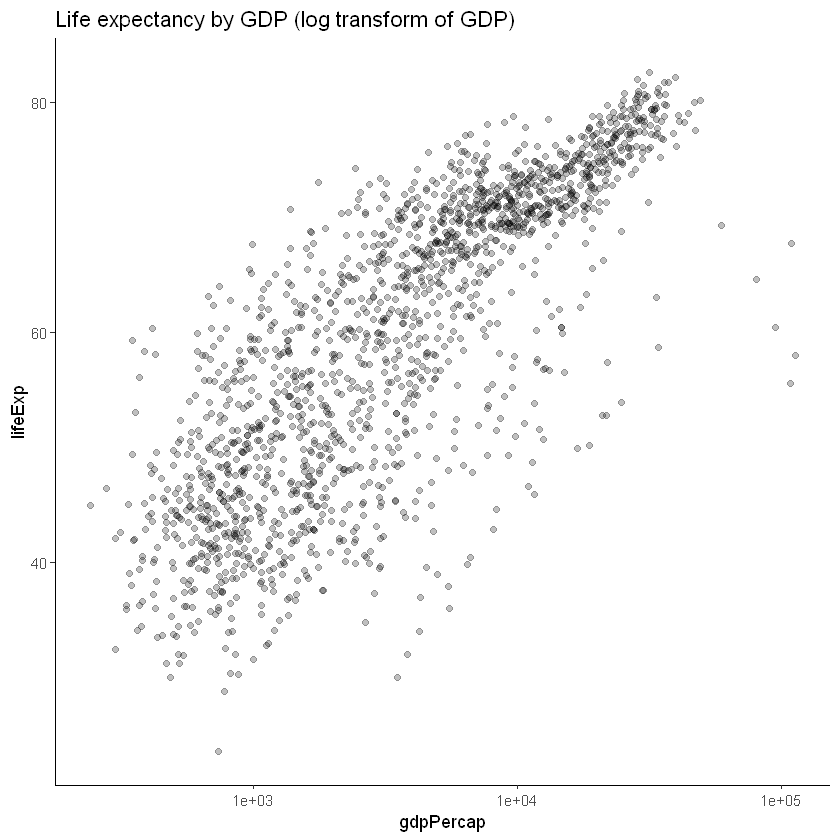

In [36]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
   geom_point(alpha=0.25) +
   scale_x_log10()+
   theme_classic()+
    ggtitle("Life expectancy by GDP (log transform of GDP)") 



Already we can more easily visualize the trend in the data. 

Next, let's overlay statistics by fiting a simple relationship to the data. Modify the code from the previous question by adding a `geom_smooth` layer.

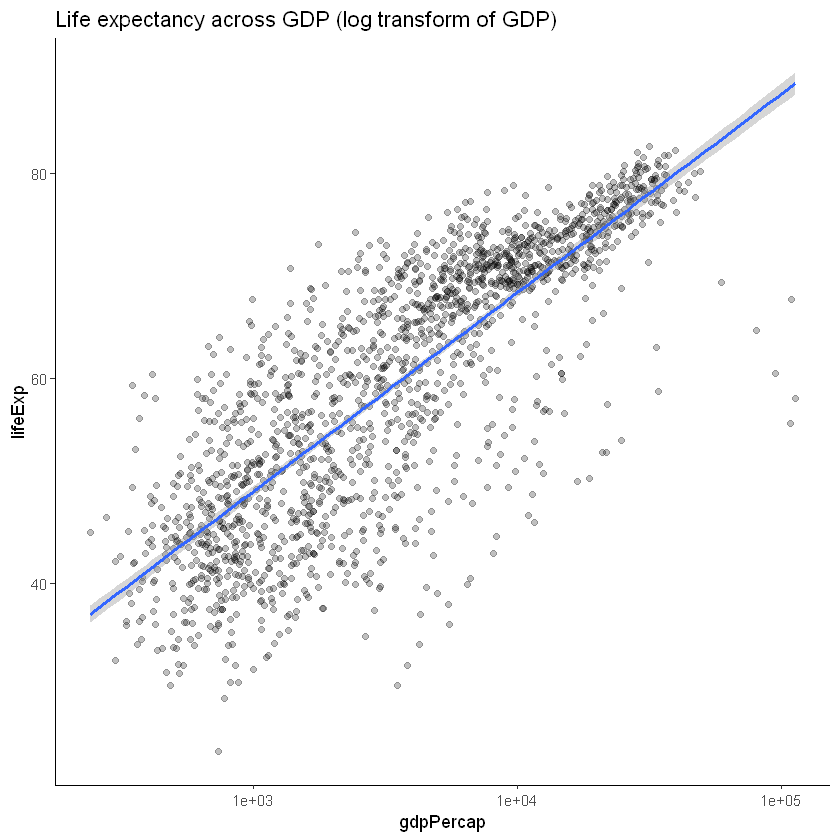

In [39]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
    geom_point(alpha=0.25) +
    scale_x_log10()+
    geom_smooth(method='lm')+
    theme_classic()+
    ggtitle("Life expectancy across GDP (log transform of GDP)") 



Again, we can add a layer of detail by introducing separate colors for each continent. We can also create individual trendlines for each continent, instead of only one trendline.

Modify the code from the previous question to add these elements. 


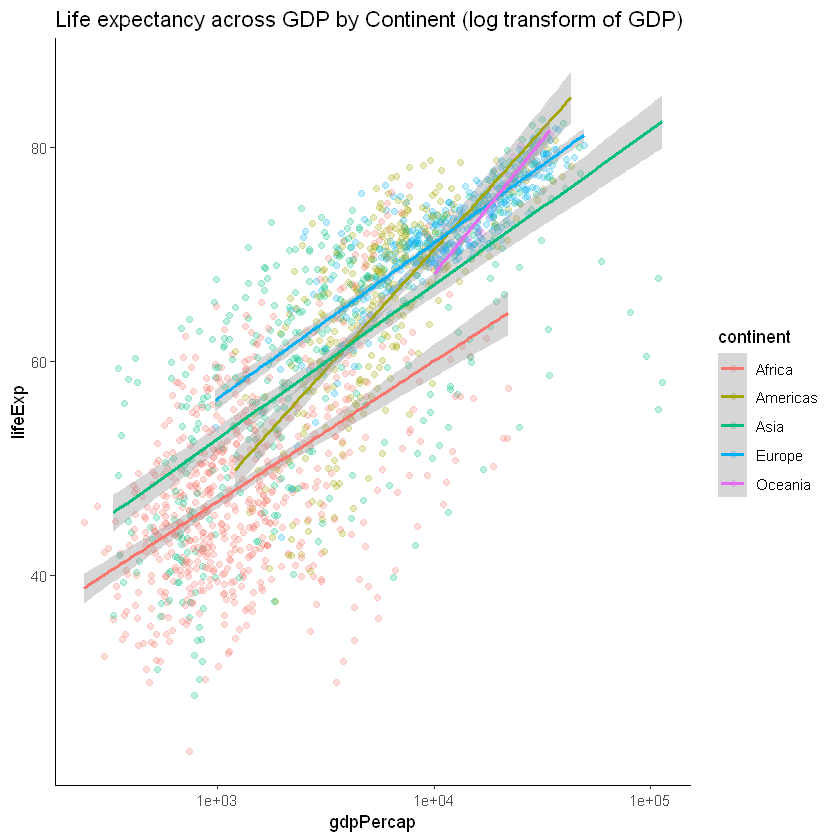

In [40]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp, colour=continent)) +
    geom_point(alpha=0.25) +
    scale_x_log10()+
    geom_smooth(method='lm')+
    theme_classic()+
    ggtitle("Life expectancy across GDP by Continent (log transform of GDP)") 



---
# 3. Multipanel figures (3 points)

In question 1, we visualized the change in life expectancy over time for every country in one plot. An alternative method is to use facet panels to split each country into its own plot.

First, create a subset of data that only includes the 25 countries from the `Americas` continent. Now we can add a `facet_wrap` layer to our line plot to create the panels by country. Additionally, to make the x-axis values easier to read, add a `theme` layer to rotate the text by 45 degrees.

In [44]:
hw3_data_murica <- hw3_data[hw3_data$continent == 'Americas',]
summary(hw3_data_murica);

      country       continent        year         lifeExp     
 Argentina: 12   Africa  :  0   Min.   :1952   Min.   :37.58  
 Bolivia  : 12   Americas:300   1st Qu.:1966   1st Qu.:58.41  
 Brazil   : 12   Asia    :  0   Median :1980   Median :67.05  
 Canada   : 12   Europe  :  0   Mean   :1980   Mean   :64.66  
 Chile    : 12   Oceania :  0   3rd Qu.:1993   3rd Qu.:71.70  
 Colombia : 12                  Max.   :2007   Max.   :80.65  
 (Other)  :228                                                
      pop              gdpPercap    
 Min.   :   662850   Min.   : 1202  
 1st Qu.:  2962359   1st Qu.: 3428  
 Median :  6227510   Median : 5466  
 Mean   : 24504795   Mean   : 7136  
 3rd Qu.: 18340309   3rd Qu.: 7830  
 Max.   :301139947   Max.   :42952  
                                    

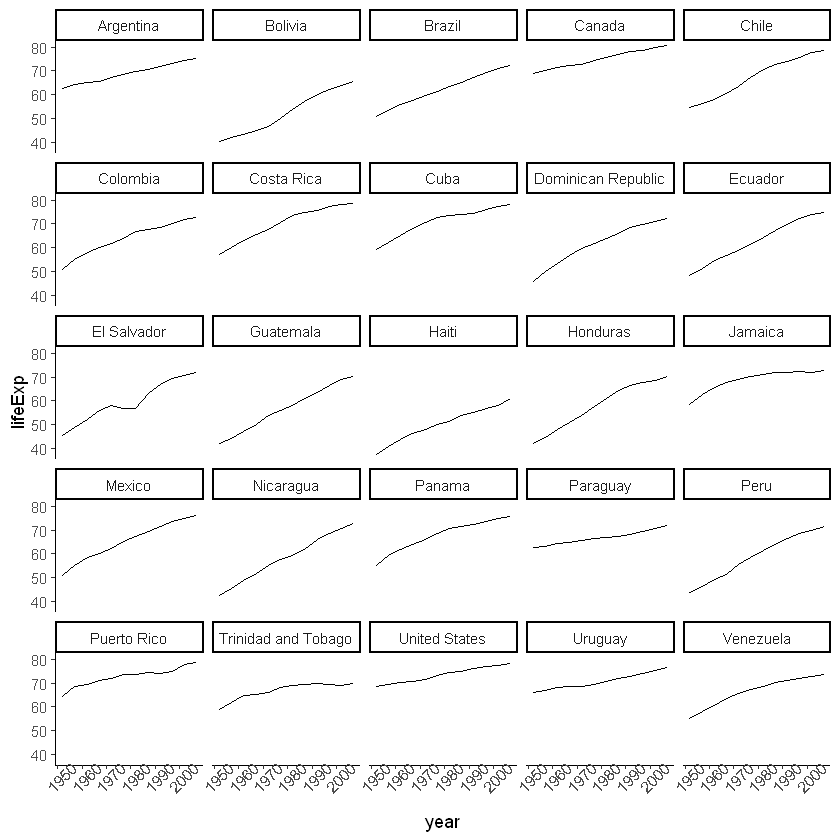

In [46]:
ggplot(hw3_data_murica, mapping = aes(x = year, y = lifeExp)) +
   geom_line() +
   facet_wrap(vars(country)) +
   theme_classic() +
   theme(axis.text.x = element_text(angle = 45))

Imagine that we wanted to publish this figure in a manuscript. Make the following changes to the code from the previous question to create a cleaner figure:

* Change the y-axis label (using `labs` layer)
* Add a figure title (using `labs` layer)
* Add a legend (using `labs` layer)
* Rotate x-axis value text to 90 degrees

*Hint: legend titles are set using the same names used in the aes specification. So, we need to add a `color` aes mapping to the global plot definition and reference this in the `labs` layer to specify the legend name.*

In [59]:
LEP <- ggplot(hw3_data_murica, mapping = aes(x = year, y = lifeExp, colour=country)) +
   geom_line() +
   theme_classic() +
   facet_wrap(vars(country)) +
   labs(title = "Life expectancy across the Americas", x= "year", y="Life expectancy", colour = "Country") +
   theme(axis.text.x = element_text(angle = 90))
# print(LEP, vp=grid::viewport(width=unit(7.5, 'inch'), height=unit(7, 'inch'))) ##How do I make this fit??


Now let's look at how life expectancy varies by continent over time. Create a multipanel figure where each panel contains five boxplots (one for each continent) and each panel represents one year of data. Include a legend instead of x-axis title and labels.

*Hint: the `theme` layer allows you to set attributes as `element_blank()`.*

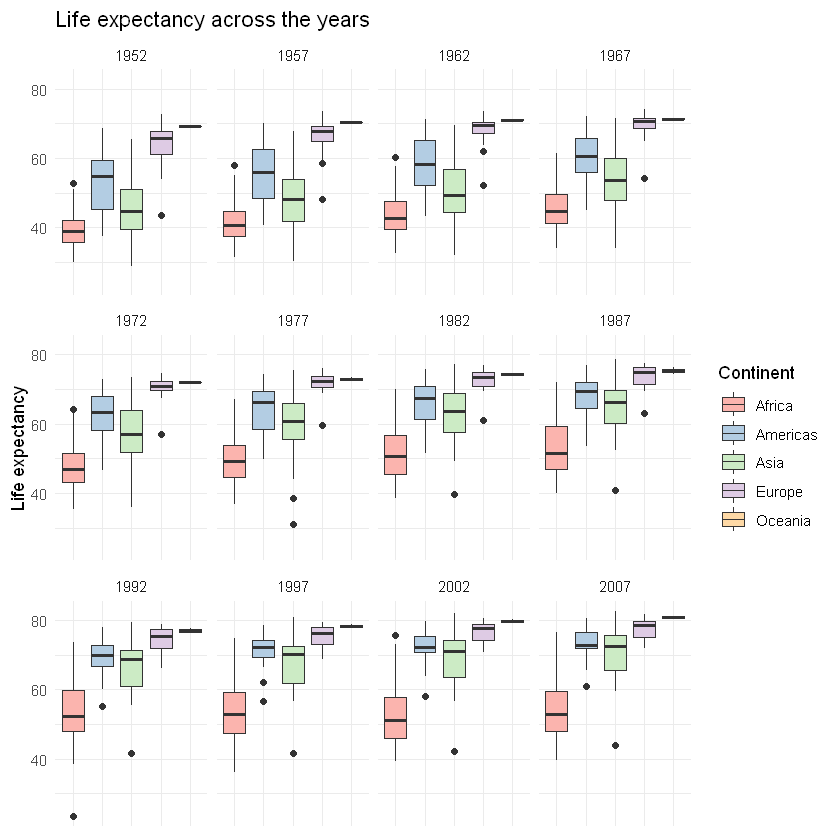

In [48]:
ggplot(hw3_data, mapping = aes(x = continent, y = lifeExp, fill=continent)) +
   geom_boxplot() +
    theme_minimal() +
   facet_wrap(vars(year)) +
   labs(title = "Life expectancy across the years", y="Life expectancy", fill = "Continent") +
   theme(axis.text.x = element_blank(),axis.title.x = element_blank(), axis.ticks = element_blank()) +
    scale_fill_brewer(palette="Pastel1")


That's all for Homework 3! When you are finished, save the notebook as Homework3.ipynb, push it to your class GitHub repository and send the instructors a link to your notebook via Canvas. 

**DUE:** 5pm EST, Feb 24, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> Emily Goldberg, da boss